# ✍🏻 Homework: Multiple Linear Regression on Video Game Sales

Date: *29/01/2026*


---



## Aim
To implement Multiple Linear Regression to predict Global Sales using regional sales data.


## Theory
Multiple Linear Regression is used to predict a dependent variable using more than one independent variable.

It helps in understanding how multiple factors affect the output.

Here, Global_Sales depend on regional sales.


## Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


## Upload Dataset


In [ ]:
from google.colab import files
uploaded = files.upload()

df = pd.read_csv("vgsales.csv")


Saving vgsales.csv to vgsales (2).csv


## Display Dataset


In [ ]:
df.head()


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


## Checking Missing Values


In [ ]:
df.isnull().sum()


,0
Rank,0
Name,0
Platform,0
Year,271
Genre,0
Publisher,58
NA_Sales,0
EU_Sales,0
JP_Sales,0
Other_Sales,0


## Handling Missing Values


In [ ]:
from sklearn.impute import SimpleImputer

num_cols = df.select_dtypes(include=np.number)

imputer = SimpleImputer(strategy="mean")

df[num_cols.columns] = imputer.fit_transform(num_cols)


Missing values are replaced using mean strategy.


## Selecting Features


In [ ]:
X = df[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']]
y = df['Global_Sales']


## Splitting Dataset


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)


## Training Model


In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

## Prediction


In [ ]:
y_pred = model.predict(X_test)
y_pred[:5]


array([0.15035549, 0.4103247 , 0.02038608, 0.02038588, 0.36032236])

## Model Evaluation


In [ ]:
from sklearn.metrics import r2_score, mean_squared_error

print("R2 Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))


R2 Score: 0.9999916069387951
MSE: 2.6912523670208097e-05


## Visualization


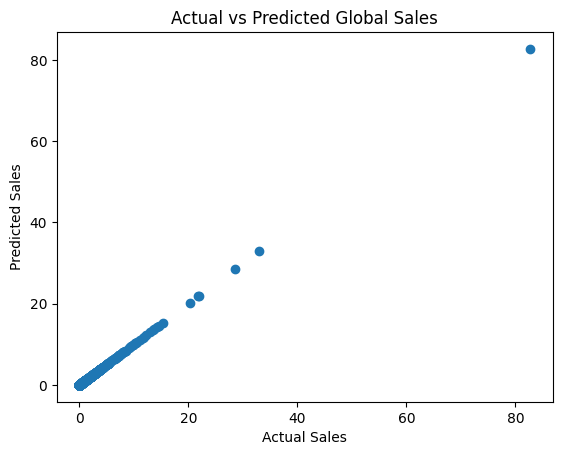

In [ ]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Global Sales")
plt.show()


## Result
Multiple Linear Regression model successfully predicted global sales using multiple regional sales inputs.


## Conclusion
Multiple Linear Regression improves prediction by considering multiple inputs affecting the output.
